In [1]:
%cd lib

C:\Users\user\ML\S-5\lib


In [ ]:
#import sys,os
#sys.path.insert(0,os.path.join(os.getcwd(), 'lib'))

In [2]:
from lib.models.pose_resnet import get_pose_net
from lib.core.config import config
from lib.core.config import update_config
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torchvision.transforms as transforms

In [ ]:
!pip install PyYAML

In [ ]:
!pip install easydict

In [3]:
config.TEST.FLIP_TEST = True
config.TEST.MODEL_FILE = '../pose_resnet_50_256x256.pth.tar'
#update_config('../experiments/mpii/resnet50/256x256_d256x3_adam_lr1e-3.yaml')
model = get_pose_net(config, is_train=False)
model.load_state_dict(torch.load('../pose_resnet_50_256x256.pth.tar'))

<All keys matched successfully>

In [4]:

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
toTensor = transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize(mean, std)])

In [5]:
def getpoint(mat):
    height, width = mat.shape
    mat = mat.reshape(-1)
    idx = np.argmax(mat)
    return idx % width, idx // width

(256, 256, 3)
(16, 64, 64)


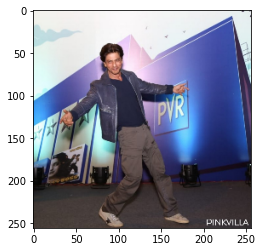

In [6]:
import cv2
import numpy as np
img = cv2.imread('../srkphotosddljpose.jpg', cv2.IMREAD_COLOR)# | cv2.IMREAD_IGNORE_ORIENTATION)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (256, 256))
x = toTensor(img).unsqueeze(0)
#with torch.no_grad():
#    res = model.forward(x)
res = model(x)
res = np.array(res.detach().squeeze())
print(img.shape)
print(res.shape)
plt.imshow(img)

In [7]:
ls=None
threshold=0.7
final_keypoints=[]
for mat in res:
    ls=list(cv2.minMaxLoc(mat))
    if ls[1]>threshold:
        final_keypoints.append(ls[3])
    else:
        final_keypoints.append(-1)

In [8]:
final_keypoints

[(22, 58),
 (30, 49),
 (28, 35),
 (32, 34),
 (38, 47),
 (40, 58),
 (30, 35),
 (24, 21),
 (24, 19),
 (23, 10),
 (12, 30),
 (16, 27),
 (19, 22),
 (29, 20),
 (34, 24),
 (40, 23)]

In [9]:
last_valid=-1
for i in range(len(final_keypoints)):
    if final_keypoints[i]==-1 and last_valid != -1:
        final_keypoints[i]=last_valid
    else:
        last_valid=final_keypoints[i]

In [10]:
final_keypoints

[(22, 58),
 (30, 49),
 (28, 35),
 (32, 34),
 (38, 47),
 (40, 58),
 (30, 35),
 (24, 21),
 (24, 19),
 (23, 10),
 (12, 30),
 (16, 27),
 (19, 22),
 (29, 20),
 (34, 24),
 (40, 23)]

(64, 64, 3)
22 58
30 49
28 35
32 34
38 47
40 58
30 35
24 21
24 19
23 10
12 30
16 27
19 22
29 20
34 24
40 23


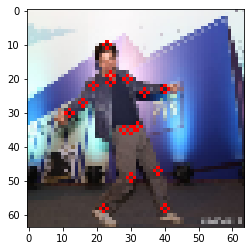

In [11]:
image = cv2.resize(img, (64, 64))
print(image.shape)
for mat in final_keypoints:
    x, y = mat
    print(x, y)
    cv2.circle(image, (x, y), 1, (255, 0, 0), 1)
import matplotlib.pyplot as plt
plt.imshow(image)

(1024, 1024, 3)
<class 'numpy.ndarray'>


True

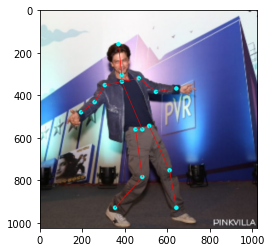

In [12]:
#conn_seq_index = [[10, 11, 12, 13, 14, 15], [0, 1, 2, 3, 4, 5], [7, 8, 9], [6, 7]]
conn_seq_index = [[0, 1, 2, 3, 4, 5], [6, 7, 8, 9], [10, 11, 12, 13, 14, 15]]
size=(1024,1024)
image = cv2.resize(img, size)
print(image.shape)
print(type(res))
scale_factor=(int)(size[0]/64)
for seq in conn_seq_index:
    for i in range(len(seq)):
        x, y = (final_keypoints[seq[i]])
        if i <len(seq)-1:
            x1,y1 = (final_keypoints[seq[i+1]]) 
            #print(x, y)
            cv2.circle(image, (x*scale_factor, y*scale_factor), 10, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
            cv2.line(image, (x*scale_factor, y*scale_factor),(x1*scale_factor,y1*scale_factor), (255, 0, 0), 2)
        else:
            cv2.circle(image, (x1*scale_factor, y1*scale_factor), 10, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
import matplotlib.pyplot as plt
plt.imshow(image)
cv2.imwrite('srk.jpg', cv2.cvtColor(image, cv2.COLOR_RGB2BGR))